EASY HOME-MADE FACE RECOGNITION SYSTEM

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import PIL

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
from tensorflow.keras.models import model_from_json

json_file = open('keras-facenet-h5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('keras-facenet-h5/model.h5')

In [154]:
FRmodel = model

In [155]:
#tf.keras.backend.set_image_data_format('channels_last')
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [156]:
#Database of encodings for each of the anchor images
database = {}

database["me"] = img_to_encoding("images/me.jpg", FRmodel)
database["wife"] = img_to_encoding("images/wife.jpg", FRmodel)
database["son"] = img_to_encoding("images/son.jpg", FRmodel)
database["papa"] = img_to_encoding("images/dad.jpg", FRmodel)
database["mama"] = img_to_encoding("images/mom.jpg", FRmodel)
database["brother"] = img_to_encoding("images/brother.jpg", FRmodel)


In [157]:
# UNQ_C3(UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: who_is_it

def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model -- your Inception model instance in Keras
    
    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """
    
    ### START CODE HERE

    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding =  img_to_encoding(image_path, model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
        dist = np.linalg.norm(encoding - db_enc)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist < min_dist:
            min_dist = dist
            identity = name
    ### END CODE HERE
    
    if min_dist > 1.1:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

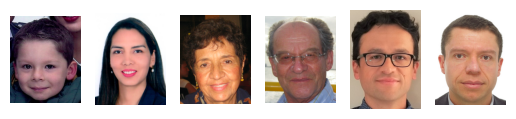

In [158]:
# Plotting Anchor images (images used as reference for the Face Recognition Algorithm)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,6)
ax[0].imshow(mpimg.imread('images/son.jpg'))
ax[1].imshow(mpimg.imread('images/wife.jpg'))
ax[2].imshow(mpimg.imread('images/mom.jpg'))
ax[3].imshow(mpimg.imread('images/dad.jpg'))
ax[4].imshow(mpimg.imread('images/brother.jpg'))
ax[5].imshow(mpimg.imread('images/me.jpg'))
for i in ax:
    i.axis('off')

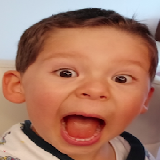

In [159]:
# Test with one picture from images directory
filename  = "images/emilio3.jpg"    
img = tf.keras.preprocessing.image.load_img(filename, target_size=(160, 160))
img

In [160]:
#WHO IS THIS ????
test = who_is_it(filename, database, FRmodel)

it's son, the distance is 0.7830974
